# **Spectral Indices**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kenoz/SITS_utils/blob/main/docs/source/tutorials/colab_sits_ex03.ipynb)

---

Using **Banc d'Arguin** as an example, we aim to **calculate one or more spectral indices**. To avoid reinventing the wheel, `sits` relies on the [spyndex](https://github.com/awesome-spectral-indices/spyndex) package. This package leverages spectral indices from the [Awesome Spectral Indices](https://github.com/awesome-spectral-indices/awesome-spectral-indices) list and provides an expression evaluation method compatible with Python object classes that support overloaded operators (e.g., `numpy.ndarray`, `pandas.Series`, `xarray.DataArray`).

---

## 1. Installation of SITS package and its depedencies

First, install `sits` package with [pip](https://pypi.org/project/SITS/). We also need some other packages for displaying data.

In [1]:
# SITS package
!pip install -q --upgrade sits

Now we can import `sits` and some other libraries.

In [ ]:
import os
# sits lib
from sits import sits, export
# geospatial libs
import geopandas as gpd
import pandas as pd
import spyndex
# date format
from datetime import datetime
# ignore warnings messages
import warnings
warnings.filterwarnings('ignore') 

## 2. Exploring spectral indices

Scientific literature offers a wide array of **spectral indices** designed to reveal specific characteristics of objects or phenomena on the Earth's surface. The [**Awesome Spectral Indices**](https://awesome-ee-spectral-indices.readthedocs.io/en/latest/) (ASI) project, initiated in late 2021, catalogs these indices—both well-established and emerging—for **optical and radar** sensors. Each index is linked to a **standardized formula**, enabling consistent computation across imagery from various satellites. Furthermore, every index is accompanied by a scientific reference, ensuring transparency and traceability.

The [**Spyndex**](https://spyndex.readthedocs.io/en/latest/) package provides seamless access to this library. It offers robust tools to **retrieve metadata** and efficiently **compute spectral indices**, streamlining their use in geospatial analyses.

Reference:
- Montero, D., Aybar, C., Mahecha, M.D. et al. A standardized catalogue of spectral indices to advance the use of remote sensing in Earth system research. *Sci Data* **10**, 197 (2023). https://doi.org/10.1038/s41597-023-02096-0

### 2.1. Which indices? Which Spectral bands?

Before loading satellite time series, we need to know which spectral indices we would like to calculate so that we can request the relevant spectral bands. First we list with Spyndex all the available indices.

In [3]:
idx_list = spyndex.indices

print(f"number of indices. {len(idx_list)}")
print(F"---\navailable indices:")
print(idx_list)

number of indices. 245
---
available indices:
['AFRI1600', 'AFRI2100', 'ANDWI', 'ARI', 'ARI2', 'ARVI', 'ATSAVI', 'AVI', 'AWEInsh', 'AWEIsh', 'BAI', 'BAIM', 'BAIS2', 'BCC', 'BI', 'BITM', 'BIXS', 'BLFEI', 'BNDVI', 'BRBA', 'BWDRVI', 'BaI', 'CCI', 'CIG', 'CIRE', 'CSI', 'CSIT', 'CVI', 'DBI', 'DBSI', 'DPDD', 'DSI', 'DSWI1', 'DSWI2', 'DSWI3', 'DSWI4', 'DSWI5', 'DVI', 'DVIplus', 'DpRVIHH', 'DpRVIVV', 'EBBI', 'EBI', 'EMBI', 'ENDVI', 'EVI', 'EVI2', 'EVIv', 'ExG', 'ExGR', 'ExR', 'FAI', 'FCVI', 'GARI', 'GBNDVI', 'GCC', 'GDVI', 'GEMI', 'GLI', 'GM1', 'GM2', 'GNDVI', 'GOSAVI', 'GRNDVI', 'GRVI', 'GSAVI', 'GVMI', 'IAVI', 'IBI', 'IKAW', 'IPVI', 'IRECI', 'LSWI', 'MBI', 'MBWI', 'MCARI', 'MCARI1', 'MCARI2', 'MCARI705', 'MCARIOSAVI', 'MCARIOSAVI705', 'MGRVI', 'MIRBI', 'MLSWI26', 'MLSWI27', 'MNDVI', 'MNDWI', 'MNLI', 'MRBVI', 'MSAVI', 'MSI', 'MSR', 'MSR705', 'MTCI', 'MTVI1', 'MTVI2', 'MuWIR', 'NBAI', 'NBLI', 'NBLIOLI', 'NBR', 'NBR2', 'NBRSWIR', 'NBRT1', 'NBRT2', 'NBRT3', 'NBRplus', 'NBSIMS', 'NBUI', 'ND705', 

To get details about an index, we can use the following spyndex attributes:
- `spyndex.indices.[*index short name*]`: index's metadata
- `spyndex.indices.[*index short name*].short_name`: Short name of the Spectral Index.
- `spyndex.indices.[*index short name*].long_name`: Long name of the Spectral Index.
- `spyndex.indices.[*index short name*].application_domain`: Required bands and parameters for the Spectral Index computation.
- `spyndex.indices.[*index short name*].bands`: Required bands and parameters for the Spectral Index computation.
- `spyndex.indices.[*index short name*].formula`: Formula (as expression) of the Spectral Index.
- `spyndex.indices.[*index short name*].reference`: URL to the reference/DOI of the Spectral Index.
- `spyndex.indices.[*index short name*].platforms`: Platforms with the required bands for the Spectral Index computation.

For example, we explore here the quite unknown **NDVI**:

In [4]:
print(f"metadata:\n{spyndex.indices.NDVI}")

print(f"---\n short name: {spyndex.indices.NDVI.short_name}")
print(f"---\n long name:{spyndex.indices.NDVI.long_name}")
print(f"---\n application domain: {spyndex.indices.NDVI.application_domain}")
print(f"---\n bands: {spyndex.indices.NDVI.bands}")
print(f"---\n formula: {spyndex.indices.NDVI.formula}")
print(f"---\n reference: {spyndex.indices.NDVI.reference}")
print(f"---\n platform: {spyndex.indices.NDVI.platforms}")

metadata:
NDVI: Normalized Difference Vegetation Index
        * Application Domain: vegetation
        * Bands/Parameters: ['N', 'R']
        * Formula: (N-R)/(N+R)
        * Reference: https://ntrs.nasa.gov/citations/19740022614
        
---
 short name: NDVI
---
 long name:Normalized Difference Vegetation Index
---
 application domain: vegetation
---
 bands: ['N', 'R']
---
 formula: (N-R)/(N+R)
---
 reference: https://ntrs.nasa.gov/citations/19740022614
---
 platform: ['Sentinel-2', 'Landsat-OLI', 'Landsat-TM', 'Landsat-ETM+', 'MODIS', 'Planet-Fusion']


We will compute three spectral indices:

- NDVI, 
- NDWI, and 
- BI

All of which include accessible metadata, just like NDVI.

In [5]:
print(f"NDWI metadata:\n{spyndex.indices.NDWI}")
print(f"EVI metadata:\n{spyndex.indices.BI}")

NDWI metadata:
NDWI: Normalized Difference Water Index
        * Application Domain: water
        * Bands/Parameters: ['G', 'N']
        * Formula: (G-N)/(G+N)
        * Reference: https://doi.org/10.1080/01431169608948714
        
EVI metadata:
BI: Bare Soil Index
        * Application Domain: soil
        * Bands/Parameters: ['S1', 'R', 'N', 'B']
        * Formula: ((S1+R)-(N+B))/((S1+R)+(N+B))
        * Reference: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.465.8749&rep=rep1&type=pdf
        


### 2.2. Selection of spectral bands

We search for all necessary spectral bands to calculate the indices. As the band names are standardized, we need to map them to the Sentinel-2 nomenclature.

In [6]:
common_bands = set()
common_bands.update(spyndex.indices.NDVI.bands)
common_bands.update(spyndex.indices.NDWI.bands)
common_bands.update(spyndex.indices.BI.bands)

print("We need to request the following bands:")
print(common_bands)

We need to request the following bands:
{'N', 'R', 'B', 'S1', 'G'}


Spyndex allows us to explore detailed information about spectral bands, including their corresponding names across different naming standards.

In [7]:
for band in common_bands:
        print(f"---\nShort name of the Band: {spyndex.bands[band].short_name}")
        print(f" - Description/Name of the Band: {spyndex.bands[band].long_name}")
        print(f" - Common name of the Band according to the EO Ext. Specification for STAC.: {spyndex.bands[band].common_name}")
        print(f" - Minimum wavelength of the spectral range of the band (nm): {spyndex.bands[band].min_wavelength}")
        print(f" - Maximum wavelength of the spectral range of the band (nm): {spyndex.bands[band].max_wavelength}")
        print(f" - Sentinel-2 band name: {spyndex.bands[band].sentinel2a.band}")

---
Short name of the Band: N
 - Description/Name of the Band: Near-Infrared (NIR)
 - Common name of the Band according to the EO Ext. Specification for STAC.: nir
 - Minimum wavelength of the spectral range of the band (nm): 760
 - Maximum wavelength of the spectral range of the band (nm): 900
 - Sentinel-2 band name: B8
---
Short name of the Band: R
 - Description/Name of the Band: Red
 - Common name of the Band according to the EO Ext. Specification for STAC.: red
 - Minimum wavelength of the spectral range of the band (nm): 620
 - Maximum wavelength of the spectral range of the band (nm): 690
 - Sentinel-2 band name: B4
---
Short name of the Band: B
 - Description/Name of the Band: Blue
 - Common name of the Band according to the EO Ext. Specification for STAC.: blue
 - Minimum wavelength of the spectral range of the band (nm): 450
 - Maximum wavelength of the spectral range of the band (nm): 530
 - Sentinel-2 band name: B2
---
Short name of the Band: S1
 - Description/Name of the 

Unfortunately, the Sentinel-2 band names don’t align perfectly with those used in the STAC catalog of the Microsoft Planetary Computer, so we need to map them manually.

In [8]:
band_mapping = {'B': 'B02', 'G': 'B03', 'R': 'B04', 'N': 'B08', 'S1': 'B11'}

## 3. Loading the sentinel-2 time series

### 3.1. Data loading

The geojson vector file describing the position of the sandbank is stored in the [Github repository](https://github.com/kenoz/SITS_utils). We download it into our current workspace.  

In [9]:
!mkdir -p test_data
![ ! -f test_data/banc_arguin.geojson ] && wget https://raw.githubusercontent.com/kenoz/SITS_utils/refs/heads/main/data/banc_arguin.geojson -P test_data

--2025-07-03 14:43:57--  https://raw.githubusercontent.com/kenoz/SITS_utils/refs/heads/main/data/banc_arguin.geojson
Resolving proxy.cidsn.jrc.it (proxy.cidsn.jrc.it)... 139.191.240.208
Connecting to proxy.cidsn.jrc.it (proxy.cidsn.jrc.it)|139.191.240.208|:8888... connected.
Proxy request sent, awaiting response... 200 OK
Length: 512 [text/plain]
Saving to: ‘test_data/banc_arguin.geojson’

banc_arguin.geojson 100%[===================>]     512  --.-KB/s    in 0s      

2025-07-03 14:43:57 (16.8 MB/s) - ‘test_data/banc_arguin.geojson’ saved [512/512]



We load the vector file, named `banc_arguin.geojson`, as a geoDataFrame object with the `sits` method: `sits.Vec2gdf()`.

In [10]:
data_dir = 'test_data'

# Load vector
v_arguin = sits.Vec2gdf(os.path.join(data_dir, 'banc_arguin.geojson'))

# Define polygon bounding box
v_arguin.set_bbox('gdf')

# CRS management
bbox_4326 = list(v_arguin.bbox.iloc[0]['geometry'].bounds)
bbox_3035 = list(v_arguin.bbox.to_crs(3035).iloc[0]['geometry'].bounds)

### 3.2. Loading and preprocessing of a Satellite Image Time-Series (SITS)

In this example, we have only one area (one polygon) to process. We use the class `sits.StacAttack` to request and preprocess the data. The request consists in retrieving Sentinel-2 images (level 2A) acquired from January 1, 2016 to January 1, 2025 with cloud cover less than 10%. Then we build a 4 bands geo-datacube ('B03', 'B04', 'B08' and 'SCL') in EPSG:3035 with a 20m spatial resolution.

In [11]:
# instance of the class sits.StacAttack()
ts_S2 = sits.StacAttack(provider='mpc',
                        collection='sentinel-2-l2a',
                        bands=['B02', 'B03', 'B04', 'B08', 'B11', 'SCL'])

# search of items based on bbox coordinates and time interval criteria
ts_S2.searchItems(bbox_4326,
                  date_start=datetime(2016, 1, 1),
                  date_end=datetime(2025, 1, 1),
                  query={"eo:cloud_cover": {"lt": 10}}
                 )
# load of the time series in a lazy way
ts_S2.loadCube(bbox_3035, resolution=20, crs_out=3035)

ts_S2.cube

<xarray.Dataset> Size: 277MB
Dimensions:      (y: 517, x: 413, time: 108)
Coordinates:
  * y            (y) float64 4kB 2.459e+06 2.459e+06 ... 2.448e+06 2.448e+06
  * x            (x) float64 3kB 3.426e+06 3.426e+06 ... 3.435e+06 3.435e+06
    spatial_ref  int32 4B 3035
  * time         (time) datetime64[ns] 864B 2016-03-18T11:11:02.030000 ... 20...
Data variables:
    B02          (time, y, x) uint16 46MB dask.array<chunksize=(1, 517, 413), meta=np.ndarray>
    B03          (time, y, x) uint16 46MB dask.array<chunksize=(1, 517, 413), meta=np.ndarray>
    B04          (time, y, x) uint16 46MB dask.array<chunksize=(1, 517, 413), meta=np.ndarray>
    B08          (time, y, x) uint16 46MB dask.array<chunksize=(1, 517, 413), meta=np.ndarray>
    B11          (time, y, x) uint16 46MB dask.array<chunksize=(1, 517, 413), meta=np.ndarray>
    SCL          (time, y, x) uint16 46MB dask.array<chunksize=(1, 517, 413), meta=np.ndarray>

## 4. Computing spectral indices

`Spyndex`’s index computation capabilities are directly embedded in the `sits` package via the `sits.StacAttack` class. Below, we demonstrate how to apply `sits` to compute one or more spectral indices from satellite time series data.

### 4.1. Computing the NDVI

The method `sits.StacAttack.spectral_index` allows us to compute one or more indices.

In [19]:
ts_S2.spectral_index('NDVI', band_mapping)

Here, we produce a `xarray.DataArray` of **NDVI**.

In [20]:
ts_S2.indices

<xarray.DataArray (time: 108, y: 517, x: 413)> Size: 184MB
dask.array<where, shape=(108, 517, 413), dtype=float64, chunksize=(1, 517, 413), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 4kB 2.459e+06 2.459e+06 ... 2.448e+06 2.448e+06
  * x            (x) float64 3kB 3.426e+06 3.426e+06 ... 3.435e+06 3.435e+06
    spatial_ref  int32 4B 3035
  * time         (time) datetime64[ns] 864B 2016-03-18T11:11:02.030000 ... 20...

The NDVI time series is plotted here with a sampling interval of 10 images. The index was derived directly from spectral bands, without masking or interpolating missing values.

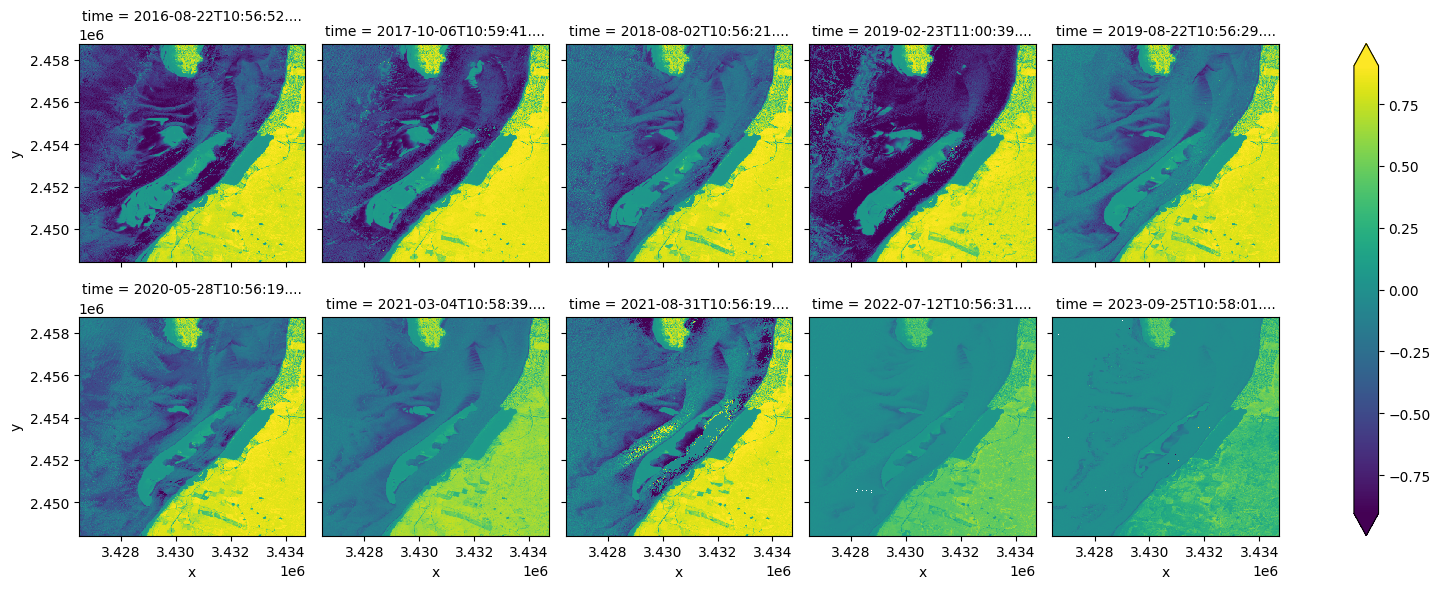

In [23]:
ts_S2.indices[8::10].plot.imshow(col_wrap=5, col="time", cmap='viridis', robust=True, size=3)

### 4.2. Computing a list of indices

The `sits.StacAttack.spectral_index` method accepts a list of indices, allowing simultaneous computation of several spectral indices instead of just one.


In [24]:
ts_S2.spectral_index(['NDVI', 'NDWI', 'BI'], band_mapping)

Here, we produce a `xarray.DataArray` that stores indices through the coordinate "index".

In [25]:
ts_S2.indices

<xarray.DataArray (index: 3, time: 108, y: 517, x: 413)> Size: 553MB
dask.array<where, shape=(3, 108, 517, 413), dtype=float64, chunksize=(1, 1, 517, 413), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 4kB 2.459e+06 2.459e+06 ... 2.448e+06 2.448e+06
  * x        (x) float64 3kB 3.426e+06 3.426e+06 ... 3.435e+06 3.435e+06
  * time     (time) datetime64[ns] 864B 2016-03-18T11:11:02.030000 ... 2024-1...
  * index    (index) <U4 48B 'NDVI' 'NDWI' 'BI'

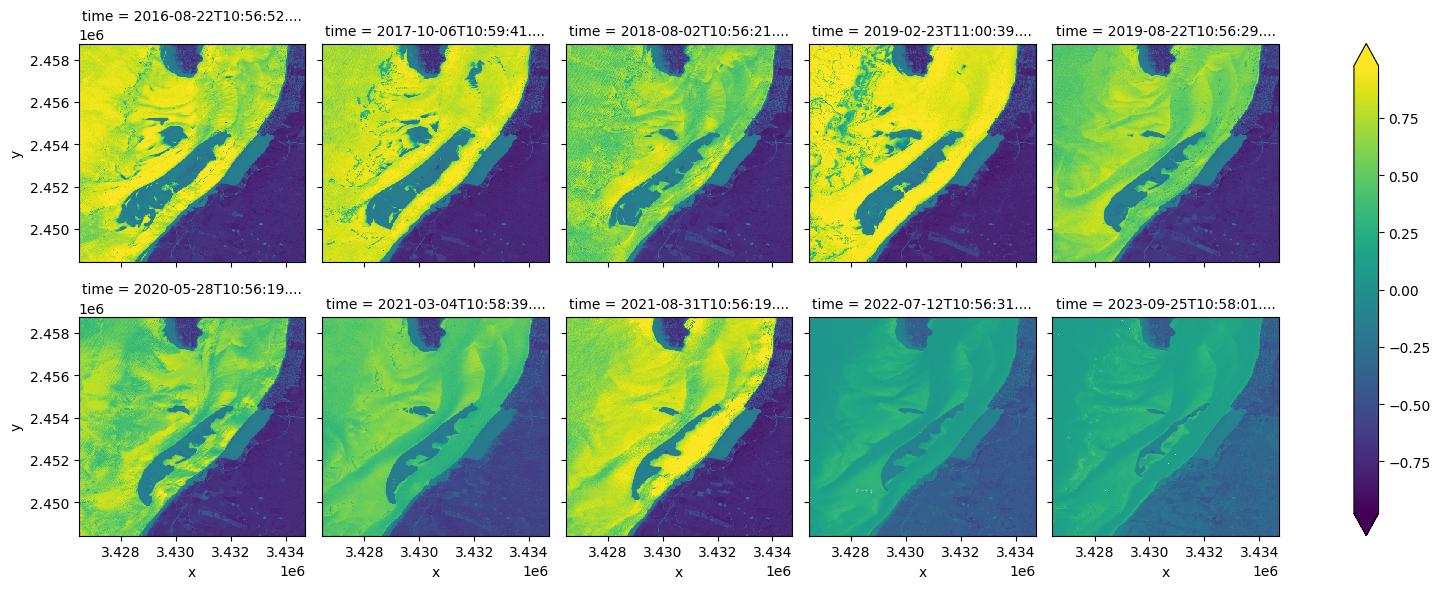

In [26]:
ts_S2.indices.sel(index='NDWI')[8::10].plot.imshow(col_wrap=5, col="time", cmap='viridis', robust=True, size=3)